In [1]:
# Importing the pandas library
import pandas as pd

In [2]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load the first Excel sheet
sheet1 = pd.read_excel('C:/Users/Aman Kumar/Downloads/customer_transactions_sample.xlsx', sheet_name='Year 2009-2010')

In [4]:
# Load the second Excel sheet
sheet2 = pd.read_excel('C:/Users/Aman Kumar/Downloads/customer_transactions_sample.xlsx', sheet_name='Year 2010-2011')

In [5]:
# Concatenate the two sheets
combined_sheet = pd.concat([sheet1, sheet2], ignore_index=True)

# Display the combined sheet
combined_sheet

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
# Check for missing values
missing_values = combined_sheet.isnull().sum()

# Check for erroneous values (assuming numerical data)
erroneous_values = combined_sheet.describe().loc[['min', 'max']]

# Display the missing values and erroneous values
print("Missing Values:")
print(missing_values)
print("\nErroneous Values:")
print(erroneous_values)

Missing Values:
Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Erroneous Values:
     Quantity          InvoiceDate     Price  Customer ID
min  -80995.0  2009-12-01 07:45:00 -53594.36      12346.0
max   80995.0  2011-12-09 12:50:00  38970.00      18287.0


In [7]:
combined_sheet.isnull().sum().sum()

247389

In [21]:
df_filtered = combined_sheet[combined_sheet['Quantity'] >= 0]

In [22]:
# Check for missing values
new_missing_values = df_filtered.isnull().sum()

# Check for erroneous values (assuming numerical data)
new_erroneous_values = df_filtered.describe().loc[['min', 'max']]

# Display the missing values and erroneous values
print("Missing Values:")
print(new_missing_values)

Missing Values:
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [24]:
# Assuming combined_sheet is your DataFrame
# Specify the path where you want to save the CSV file
csv_file_path = "C:\\Users\\Aman Kumar\\Downloads\\output_new_filtered.csv"

# Export the DataFrame to a CSV file
df_filtered.to_csv(csv_file_path, index=False)  # Set index=False to exclude row indices from the CSV file


In [30]:
pip install pandas matplotlib scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd

# Assuming df is your DataFrame
# 1. Descriptive statistics
print(df_filtered.describe())

# 2. Box plot
df_filtered.boxplot(column=['Quantity', 'Price'])

# 3. Histogram
df_filtered['Quantity'].hist()

# 4. Scatter plot
df_filtered.plot.scatter(x='Quantity', y='Price')

# 5. Z-score
from scipy.stats import zscore
df_filtered['Quantity_zscore'] = zscore(df_filtered['Quantity'])
outliers = df_filtered[abs(df_filtered['Quantity_zscore']) > 3]

# 6. IQR method
Q1 = df_filtered['Price'].quantile(0.25)
Q3 = df_filtered['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_filtered[(df_filtered['Price'] < lower_bound) | (df_filtered['Price'] > upper_bound)]


           Quantity                    InvoiceDate         Price   Customer ID
count  1.044421e+06                        1044421  1.044421e+06  1.044421e+06
mean   1.117612e+01  2011-01-03 13:08:35.693996544  3.914376e+00  1.532606e+04
min    1.000000e+00            2009-12-01 07:45:00 -5.359436e+04  1.234600e+04
25%    1.000000e+00            2010-07-11 14:19:00  1.250000e+00  1.404000e+04
50%    3.000000e+00            2010-12-07 15:32:00  2.100000e+00  1.526345e+04
75%    1.000000e+01            2011-07-24 11:25:00  4.130000e+00  1.674400e+04
max    8.099500e+04            2011-12-09 12:50:00  2.511109e+04  1.828700e+04
std    1.294560e+02                            NaN  9.451415e+01  1.639995e+03


C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_26288\2992128819.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Quantity_zscore'] = zscore(df_filtered['Quantity'])


Descriptive Statistics:
           Quantity                    InvoiceDate         Price  \
count  1.044421e+06                        1044421  1.044421e+06   
mean   1.117612e+01  2011-01-03 13:08:35.693996544  3.914376e+00   
min    1.000000e+00            2009-12-01 07:45:00 -5.359436e+04   
25%    1.000000e+00            2010-07-11 14:19:00  1.250000e+00   
50%    3.000000e+00            2010-12-07 15:32:00  2.100000e+00   
75%    1.000000e+01            2011-07-24 11:25:00  4.130000e+00   
max    8.099500e+04            2011-12-09 12:50:00  2.511109e+04   
std    1.294560e+02                            NaN  9.451415e+01   

        Customer ID  Quantity_zscore  
count  1.044421e+06     1.044421e+06  
mean   1.532606e+04    -3.265546e-18  
min    1.234600e+04    -7.860676e-02  
25%    1.404000e+04    -7.860676e-02  
50%    1.526345e+04    -6.315749e-02  
75%    1.674400e+04    -9.085063e-03  
max    1.828700e+04     6.255703e+02  
std    1.639995e+03     1.000000e+00  


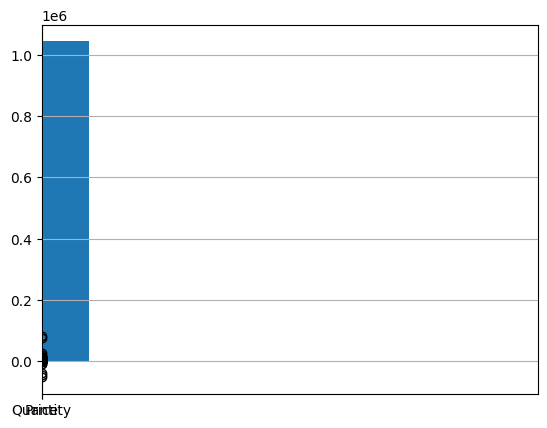

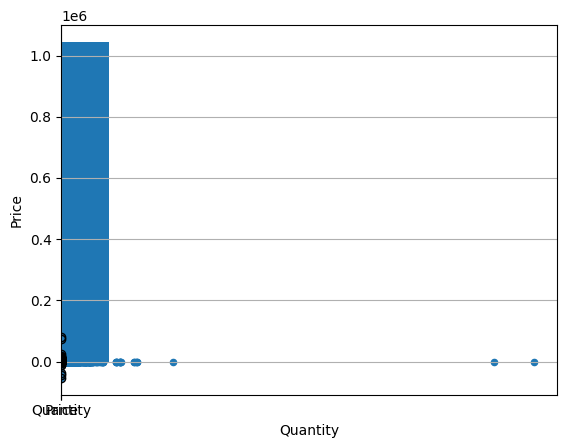

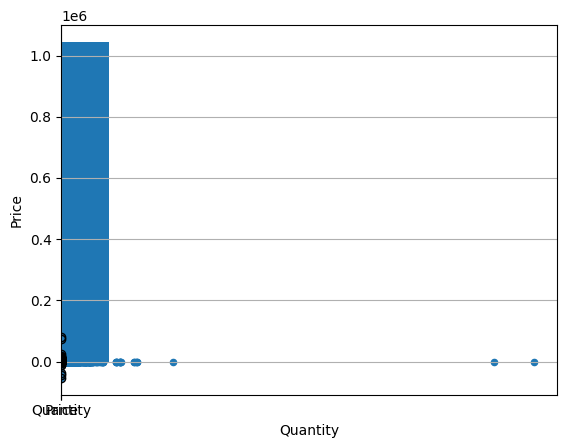

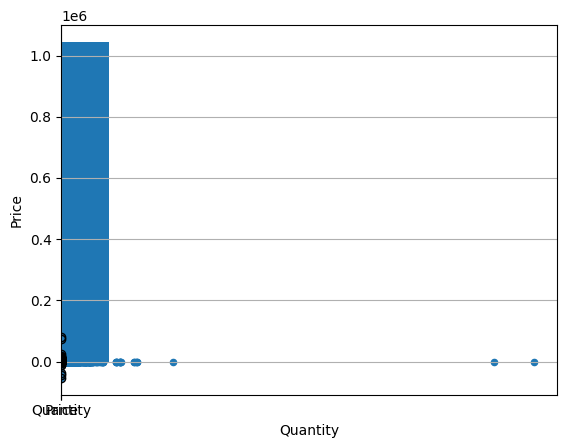

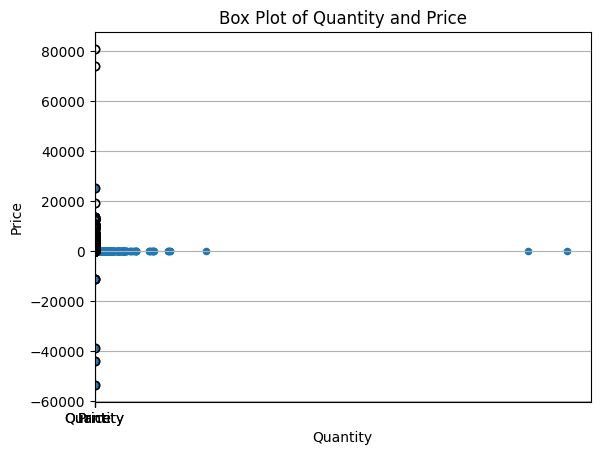

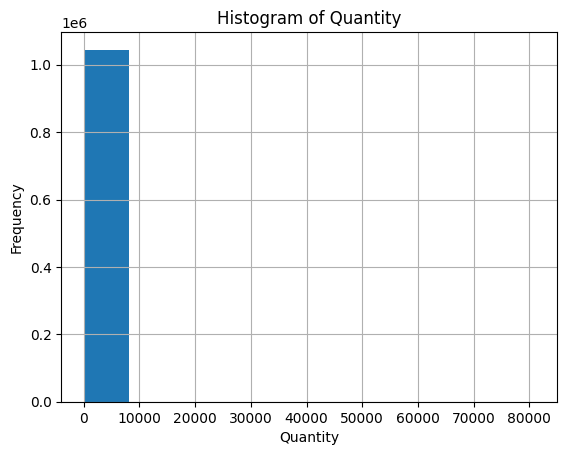

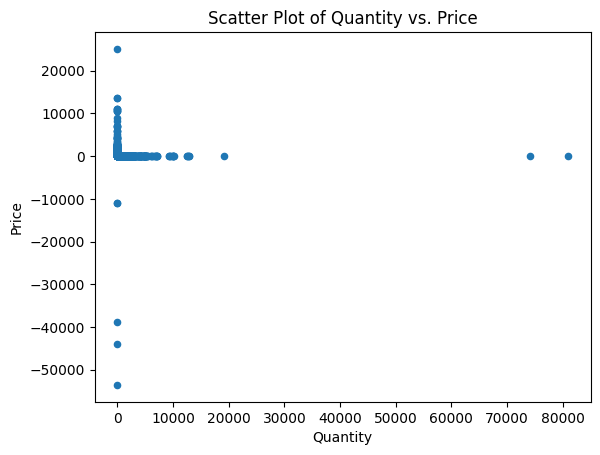

Outliers detected using Z-score:
        Invoice StockCode                          Description  Quantity  \
217      489460     84598        BOYS ALPHABET IRON ON PATCHES       576   
575      489523     84879        ASSORTED COLOUR BIRD ORNAMENT       800   
3572     489727     22086      PAPER CHAIN KIT 50'S CHRISTMAS        450   
4793     489831     84347  ROTATING SILVER ANGELS T-LIGHT HLDR       480   
6443     489889    85123A   WHITE HANGING HEART T-LIGHT HOLDER       480   
...         ...       ...                                  ...       ...   
1063344  581375     21137             BLACK RECORD COVER FRAME       960   
1065522  581457     23543                  WALL ART KEEP CALM        698   
1065531  581458     22197                       POPCORN HOLDER      1500   
1065532  581459     22197                       POPCORN HOLDER      1200   
1065882  581483     23843          PAPER CRAFT , LITTLE BIRDIE     80995   

                InvoiceDate  Price  Customer ID       

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

df = pd.DataFrame(df_filtered)

# Remove rows where quantity is less than 0
df_filtered = df[df['Quantity'] >= 0]

# 1. Descriptive statistics
print("Descriptive Statistics:")
print(df_filtered.describe())

# 2. Box plot
df_filtered.boxplot(column=['Quantity', 'Price'])
plt.title('Box Plot of Quantity and Price')
plt.show()

# 3. Histogram
df_filtered['Quantity'].hist()
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# 4. Scatter plot
df_filtered.plot.scatter(x='Quantity', y='Price')
plt.title('Scatter Plot of Quantity vs. Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

# 5. Z-score for outlier detection
df_filtered['quantity_zscore'] = zscore(df_filtered['Quantity'])
outliers_zscore = df_filtered[abs(df_filtered['quantity_zscore']) > 3]
print("Outliers detected using Z-score:")
print(outliers_zscore)

# 6. IQR method for outlier detection
Q1 = df_filtered['Price'].quantile(0.25)
Q3 = df_filtered['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df_filtered[(df_filtered['Price'] < lower_bound) | (df_filtered['Price'] > upper_bound)]
print("Outliers detected using IQR method:")
print(outliers_iqr)

#Filling Null Values

In [8]:
combined_sheet2 = combined_sheet.fillna(value = 0)
combined_sheet2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [9]:
combined_sheet2.isnull().sum().sum()

0

In [10]:
# Filling null values with a previous value

df4 = combined_sheet.fillna(method = 'pad')
df4

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_26288\4055443907.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df4 = combined_sheet.fillna(method = 'pad')


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [11]:
combined_sheet['Customer ID'] = combined_sheet['Customer ID'].interpolate(method='linear',limit_direction='forward')

In [12]:
combined_sheet['Description'] = combined_sheet['Description'].fillna(method = 'pad')
combined_sheet

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_26288\994300781.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_sheet['Description'] = combined_sheet['Description'].fillna(method = 'pad')


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [13]:
# Check for missing values
missing_values = combined_sheet.isnull().sum()

# Check for erroneous values (assuming numerical data)
erroneous_values = combined_sheet.describe().loc[['min', 'max']]

# Display the missing values and erroneous values
print("Missing Values:")
print(missing_values)
print("\nErroneous Values:")
print(erroneous_values)

Missing Values:
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

Erroneous Values:
     Quantity          InvoiceDate     Price  Customer ID
min  -80995.0  2009-12-01 07:45:00 -53594.36      12346.0
max   80995.0  2011-12-09 12:50:00  38970.00      18287.0


In [14]:
combined_sheet = combined_sheet.dropna(how='all')
combined_sheet

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


           Quantity                    InvoiceDate         Price   Customer ID
count  1.067371e+06                        1067371  1.067371e+06  1.067371e+06
mean   9.938898e+00  2011-01-02 21:13:55.394028544  4.649388e+00  1.532007e+04
min   -8.099500e+04            2009-12-01 07:45:00 -5.359436e+04  1.234600e+04
25%    1.000000e+00            2010-07-09 09:46:00  1.250000e+00  1.403112e+04
50%    3.000000e+00            2010-12-07 15:28:00  2.100000e+00  1.525359e+04
75%    1.000000e+01            2011-07-22 10:23:00  4.150000e+00  1.673500e+04
max    8.099500e+04            2011-12-09 12:50:00  3.897000e+04  1.828700e+04
std    1.727058e+02                            NaN  1.235531e+02  1.640691e+03


ModuleNotFoundError: No module named 'scipy'

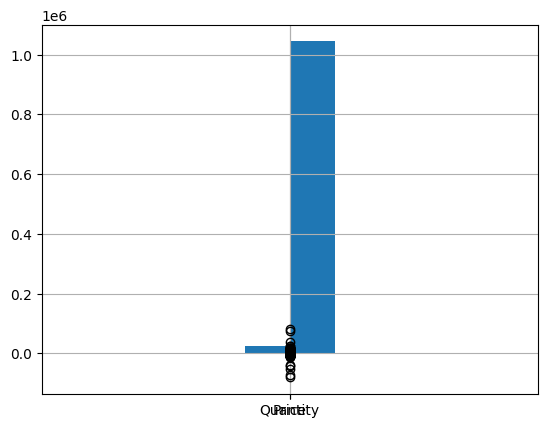

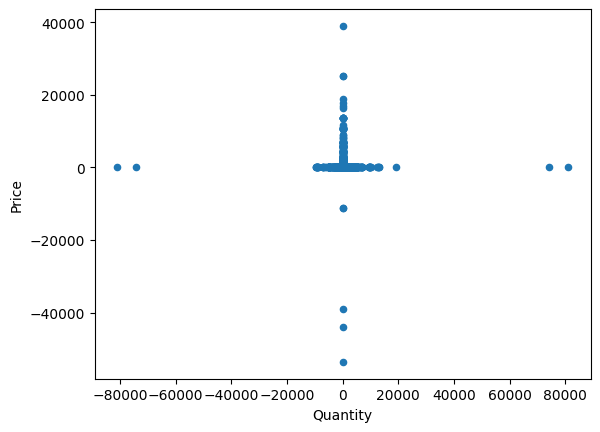

In [15]:
import pandas as pd

# Assuming df is your DataFrame
# 1. Descriptive statistics
print(combined_sheet.describe())

# 2. Box plot
combined_sheet.boxplot(column=['Quantity', 'Price'])

# 3. Histogram
combined_sheet['Quantity'].hist()

# 4. Scatter plot
combined_sheet.plot.scatter(x='Quantity', y='Price')

# 5. Z-score
from scipy.stats import zscore
combined_sheet['Quantity_zscore'] = zscore(df['Quantity'])
outliers = combined_sheet[abs(df['Quantity_zscore']) > 3]

# 6. IQR method
Q1 = combined_sheet['Price'].quantile(0.25)
Q3 = combined_sheet['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = combined_sheet[(combined_sheet['Price'] < lower_bound) | (combined_sheet['Price'] > upper_bound)]


In [ ]:
# Assuming combined_sheet is your DataFrame
# Specify the path where you want to save the CSV file
csv_file_path = "C:\\Users\\Aman Kumar\\Downloads\\output.csv"

# Export the DataFrame to a CSV file
combined_sheet.to_csv(csv_file_path, index=False)  # Set index=False to exclude row indices from the CSV file
